# Summary of the ASL alphabet classification project

## Data exploration and normalization

In [1]:
train_dir = "/content/Train_Alphabet"
test_dir = "/content/Test_Alphabet"

In [13]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

x_train, y_train, target_labels_train = load_dataset(train_dir)
x_test, y_test, target_labels_test = load_dataset(test_dir)

In [15]:
# Image format
print(x_train[0], '<-!->', y_train[0], '<-!->', target_labels_train[y_train[0]])
print("Number of train images: " + str(len(x_train)))
print("Number of test images: " + str(len(x_test)))

/content/Train_Alphabet/D/ad364885-e5de-45b9-8e8e-125d8f084ef6.rgb_0000.png <-!-> 4 <-!-> D
Number of train images: 24300
Number of test images: 2700


Number of letters: 27


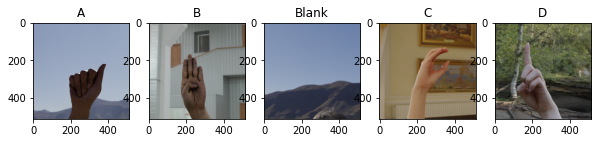

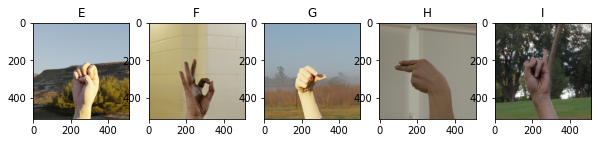

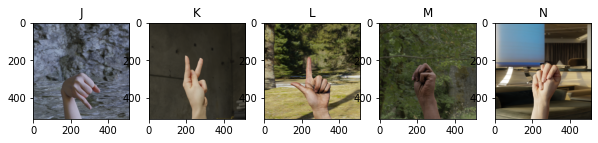

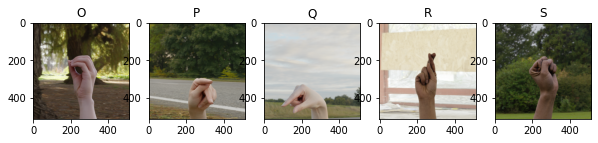

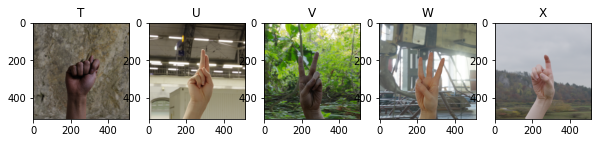

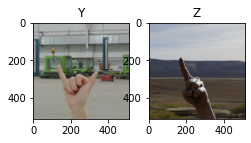

In [16]:
label_index, indices = np.unique(y_train, return_index=True)
print("Number of letters: " + str(len(label_index)))

for i in range(0, 26, 5):
    plt.figure(figsize=(10,10))
    if i == 25:
        for j in range(0, 2, 1):
            plt.subplot(1,5,j+1)
            plt.imshow(load_img(x_train[indices[i+j]]))
            plt.title(target_labels_train[label_index[i+j]])
    else:
        for j in range(0, 5, 1):
            plt.subplot(1,5,j+1)
            plt.imshow(load_img(x_train[indices[i+j]]))
            plt.title(target_labels_train[label_index[i+j]])
    plt.show()

## Classification

## Model 1: Sequential model, acc 92.6%

In [ ]:
dim_x, dim_y = 100,100
epochs = 10
batch_size=32
input_shape = (dim_x,dim_y,3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(27, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(27))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(27))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Model 2:

## Model 3: